<a href="https://colab.research.google.com/github/Avinashrao10/DeepLearning/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
image = X_train[0]

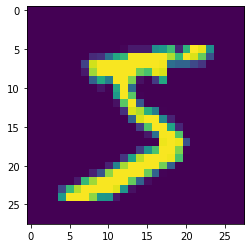

In [ ]:
plt.imshow(image)

MNIST

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import numpy as np
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
num_classes = 10
train_labels_cat = to_categorical(Y_train,num_classes)
test_labels_cat = to_categorical(Y_test,num_classes)
X_train = np.reshape(X_train,(60000,28,28,1))
X_test = np.reshape(X_test,(10000,28,28,1))
model = Sequential()
conv1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1))
model.add(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))
model.add(pool1)
dropOutLayer = Dropout(0.2)
model.add(dropOutLayer)
conv2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')
model.add(conv2)
pool2 =  MaxPooling2D(pool_size=(2,2))
model.add(pool2)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=train_labels_cat,batch_size=64,epochs=16)

Epoch 1/16
938/938 [==============================] - 68s 73ms/step - loss: 0.5784 - accuracy: 0.9240
Epoch 2/16
938/938 [==============================] - 68s 73ms/step - loss: 0.0754 - accuracy: 0.9771
Epoch 3/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0544 - accuracy: 0.9829
Epoch 4/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0428 - accuracy: 0.9864
Epoch 5/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0378 - accuracy: 0.9877
Epoch 6/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0361 - accuracy: 0.9884
Epoch 7/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 8/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0304 - accuracy: 0.9901
Epoch 9/16
938/938 [==============================] - 68s 72ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 10/16
938/938 [==============================] - 68s 72ms/step - loss: 0.026

In [ ]:
test_loss, test_accuracy = \
  model.evaluate(X_test, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 3s 20ms/step - loss: 0.0469 - accuracy: 0.9908
Test loss: 0.0469 accuracy: 0.9908


In [ ]:
predictions = model.predict(X_test)

In [ ]:
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(test_labels_cat,axis=1)[:25]

In [ ]:
first20_preds

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4])

In [ ]:
first20_true

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4])

In [ ]:
kr_test_pred = np.argmax(predictions, axis=1)

In [ ]:
(np.argmax(predictions, axis=1) != np.argmax(test_labels_cat,axis=1)).sum()

92